Reference: https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
total_rows = train_df.count()
print("Training Dataset: ",train_df.shape)

Training Dataset:  (7095, 3)


In [4]:
train_df

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [5]:
print("Number of Unique images in training: ",train_df.ImageId.nunique())

Number of Unique images in training:  6666


In [6]:
print("Number of images with no pixel encodings: ",train_df.isnull().sum().sum())

Number of images with no pixel encodings:  0


In [7]:
defects_per_image=train_df.groupby(['ImageId']).size().to_frame()
defects_per_image.rename(columns={0: 'Number of Defects'}, inplace=True)

In [8]:
print ("Number of images with 1 defect: ",defects_per_image.loc[defects_per_image['Number of Defects'] == 1].count())
print ("Number of images with 2 defects: ",defects_per_image.loc[defects_per_image['Number of Defects'] == 2].count())
print ("Number of images with 3 defects: ",defects_per_image.loc[defects_per_image['Number of Defects'] == 3].count())
print ("Number of images with 4 defects: ",defects_per_image.loc[defects_per_image['Number of Defects'] == 4].count())
print ("Number of images with more than 4 defects: ",defects_per_image.loc[defects_per_image['Number of Defects'] > 4].count())

Number of images with 1 defect:  Number of Defects    6239
dtype: int64
Number of images with 2 defects:  Number of Defects    425
dtype: int64
Number of images with 3 defects:  Number of Defects    2
dtype: int64
Number of images with 4 defects:  Number of Defects    0
dtype: int64
Number of images with more than 4 defects:  Number of Defects    0
dtype: int64


In [9]:
df_defect_count = train_df.groupby(['ClassId']).count()

In [10]:
df_defect_count=df_defect_count.drop('ImageId',axis=1)

In [11]:
df_defect_count.rename(columns={'EncodedPixels': 'Number of Images'}, inplace=True)
df_defect_count.head()

,Number of Images
ClassId,
1,897
2,247
3,5150
4,801


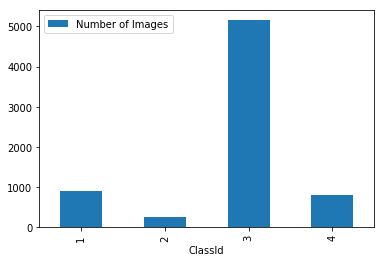

In [12]:
df_defect_count.plot.bar()

In [13]:
#train_df['ClassId_EncodedPixels'] = train_df.apply(lambda row: (row['ClassId'], row['EncodedPixels']), axis = 1)

In [13]:
train_df

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [15]:
#grouped_EncodedPixels = train_df.groupby('ImageId')['ClassId_EncodedPixels'].count()

In [16]:
#grouped_EncodedPixels

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
                ..
ffcf72ecf.jpg    1
fff02e9c5.jpg    1
fffe98443.jpg    1
ffff4eaa8.jpg    1
ffffd67df.jpg    1
Name: ClassId_EncodedPixels, Length: 6666, dtype: int64

In [16]:
train_df_encoded =  train_df

In [16]:
#train_df_encoded = train_df_encoded.sort_values(by ='ImageId' )
#train_df_encoded

,ImageId,ClassId,EncodedPixels,ClassId_EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,"(1, 29102 12 29346 24 29602 24 29858 24 30114 ..."
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,"(3, 18661 28 18863 82 19091 110 19347 110 1960..."
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,"(1, 37607 3 37858 8 38108 14 38359 20 38610 25..."
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,"(4, 131973 1 132228 4 132483 6 132738 8 132993..."
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,"(3, 229501 11 229741 33 229981 55 230221 77 23..."
...,...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...,"(3, 121911 34 122167 101 122422 169 122678 203..."
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...,"(3, 207523 3 207777 9 208030 15 208283 22 2085..."
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...,"(3, 105929 5 106177 14 106424 24 106672 33 106..."
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...,"(3, 16899 7 17155 20 17411 34 17667 47 17923 6..."


In [17]:
#train_clean = train_df_encoded[['ImageId', 'ClassId']].copy()

In [18]:
#train_clean['Score']=int(1)
#train_clean.head()

,ImageId,ClassId,Score
0,0002cc93b.jpg,1,1
1,0007a71bf.jpg,3,1
2,000a4bcdd.jpg,1,1
3,000f6bf48.jpg,4,1
4,0014fce06.jpg,3,1


In [17]:
train_c = train_df_encoded[['ImageId', 'ClassId']].copy()

In [18]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 2 columns):
ImageId    7095 non-null object
ClassId    7095 non-null int64
dtypes: int64(1), object(1)
memory usage: 111.0+ KB


In [19]:
train_c['ClassId'] = train_c['ClassId'].astype(str)

In [20]:
train_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 2 columns):
ImageId    7095 non-null object
ClassId    7095 non-null object
dtypes: object(2)
memory usage: 111.0+ KB


In [21]:
train_c['ClassId'] = "Defect" + train_c['ClassId']

In [22]:
train_c.head()

,ImageId,ClassId
0,0002cc93b.jpg,Defect1
1,0007a71bf.jpg,Defect3
2,000a4bcdd.jpg,Defect1
3,000f6bf48.jpg,Defect4
4,0014fce06.jpg,Defect3


In [23]:
cat_columns = ["ClassId"]

In [24]:
train_c = pd.get_dummies(train_c, prefix_sep="__",columns=cat_columns)

In [73]:
#training_clean.rename(columns={0: 'ImageId'}, inplace=True)
#training_clean.head()

,ImageId
0,0002cc93b.jpg
1,0007a71bf.jpg
2,000a4bcdd.jpg
3,000f6bf48.jpg
4,0014fce06.jpg


In [19]:
#train_clean = train_clean.pivot(index='ImageId', columns='ClassId',values='Score')

In [20]:
#train_clean = train_clean.fillna(0)
#train_clean.head()

ClassId,1,2,3,4
ImageId,,,,
0002cc93b.jpg,1.0,0.0,0.0,0.0
0007a71bf.jpg,0.0,0.0,1.0,0.0
000a4bcdd.jpg,1.0,0.0,0.0,0.0
000f6bf48.jpg,0.0,0.0,0.0,1.0
0014fce06.jpg,0.0,0.0,1.0,0.0


In [21]:
#train_clean.head()

ClassId,1,2,3,4
ImageId,,,,
0002cc93b.jpg,1.0,0.0,0.0,0.0
0007a71bf.jpg,0.0,0.0,1.0,0.0
000a4bcdd.jpg,1.0,0.0,0.0,0.0
000f6bf48.jpg,0.0,0.0,0.0,1.0
0014fce06.jpg,0.0,0.0,1.0,0.0


In [22]:
#for col in train_clean.columns: 
#    print(col) 

1
2
3
4


In [78]:
#train_clean.index

Index(['0002cc93b.jpg', '0007a71bf.jpg', '000a4bcdd.jpg', '000f6bf48.jpg',
       '0014fce06.jpg', '0025bde0c.jpg', '002af848d.jpg', '002fc4e19.jpg',
       '0030401a5.jpg', '0046839bd.jpg',
       ...
       'ff9923932.jpg', 'ff9d46e95.jpg', 'ffb48ee43.jpg', 'ffbd081d5.jpg',
       'ffc9fdf70.jpg', 'ffcf72ecf.jpg', 'fff02e9c5.jpg', 'fffe98443.jpg',
       'ffff4eaa8.jpg', 'ffffd67df.jpg'],
      dtype='object', name='ImageId', length=6666)

In [23]:
#train_clean.reset_index(inplace=True)


In [25]:
train_c

,ImageId,ClassId__Defect1,ClassId__Defect2,ClassId__Defect3,ClassId__Defect4
0,0002cc93b.jpg,1,0,0,0
1,0007a71bf.jpg,0,0,1,0
2,000a4bcdd.jpg,1,0,0,0
3,000f6bf48.jpg,0,0,0,1
4,0014fce06.jpg,0,0,1,0
...,...,...,...,...,...
7090,ffcf72ecf.jpg,0,0,1,0
7091,fff02e9c5.jpg,0,0,1,0
7092,fffe98443.jpg,0,0,1,0
7093,ffff4eaa8.jpg,0,0,1,0


In [153]:
for col in train_c.columns: 
    print(col) 

ImageId
ClassId__Defect1
ClassId__Defect2
ClassId__Defect3
ClassId__Defect4


In [13]:
#train_df_encoded.loc[train_df_encoded['ClassId'] == 1, 'Defect1'] = 1
#train_df_encoded.loc[train_df_encoded['ClassId'] == 2, 'Defect2'] = 1
#train_df_encoded.loc[train_df_encoded['ClassId'] == 3, 'Defect3'] = 1 
#train_df_encoded.loc[train_df_encoded['ClassId'] == 4, 'Defect4'] = 1 
#train_df_encoded=train_df_encoded.fillna(0)

In [47]:
#train_df_encoded.tail()

,ImageId,ClassId,EncodedPixels,ClassId_EncodedPixels,Defect1,Defect2,Defect3,Defect4
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...,"(3, 121911 34 122167 101 122422 169 122678 203...",0.0,0.0,1.0,0.0
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...,"(3, 207523 3 207777 9 208030 15 208283 22 2085...",0.0,0.0,1.0,0.0
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...,"(3, 105929 5 106177 14 106424 24 106672 33 106...",0.0,0.0,1.0,0.0
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...,"(3, 16899 7 17155 20 17411 34 17667 47 17923 6...",0.0,0.0,1.0,0.0
7094,ffffd67df.jpg,3,30931 43 31103 127 31275 211 31489 253 31745 2...,"(3, 30931 43 31103 127 31275 211 31489 253 317...",0.0,0.0,1.0,0.0


In [15]:
#train_df_encoded.shape[0]

7095

Load Dataset

In [26]:
import os
localFolder = '/home/primukh26/trainimages/'
list_f = os.listdir(localFolder)
number_files = len(list_f)
print (number_files)

12568


In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

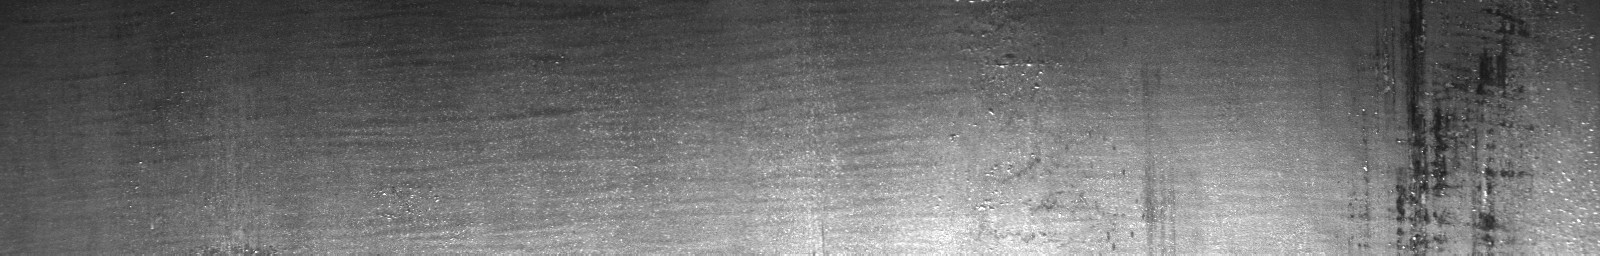

In [28]:
fileName = list_f[1]  
localpath = localFolder + fileName
image.load_img(localpath)

In [29]:
train_image = []
for i in tqdm(range(train_c.shape[0])):
    fileName = list_f[i]  
    localpath = localFolder + fileName
    img = image.load_img(localpath,target_size=(100,100,1))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 7095/7095 [00:46<00:00, 153.94it/s]


In [30]:
X = np.array(train_image)

In [31]:
X.shape

(7095, 100, 100, 3)

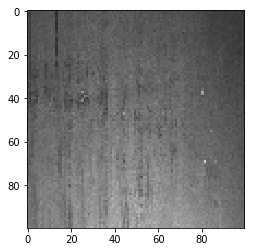

In [32]:
plt.imshow(X[2])

In [33]:
#train_df_encoded['ClassId'][2]
#train_clean.loc[[2]]

In [41]:
#y = np.array(train_df_encoded.drop(['ImageId', 'ClassId','EncodedPixels','ClassId_EncodedPixels'],axis=1))

In [34]:
y = np.array(train_c.drop(['ImageId'],axis=1))

In [35]:
y

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [37]:
X_train.shape

(5676, 100, 100, 3)

In [38]:
model = Sequential()
#input layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#hidden layers
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)       

In [79]:
opt=keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
nb_epoch = 10
nb_classes = 4
batch_size = 128

In [81]:
hist=model.fit(X_train, y_train,batch_size = batch_size, nb_epoch = nb_epoch, validation_data=(X_test, y_test), shuffle=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5676 samples, validate on 1419 samples
Epoch 1/10
5676/5676 [==============================] - 4s 781us/step - loss: 0.8600 - accuracy: 0.7243 - val_loss: 0.8466 - val_accuracy: 0.7322
Epoch 2/10
5676/5676 [==============================] - 4s 644us/step - loss: 0.8599 - accuracy: 0.7243 - val_loss: 0.8466 - val_accuracy: 0.7322
Epoch 3/10
5676/5676 [==============================] - 4s 639us/step - loss: 0.8600 - accuracy: 0.7243 - val_loss: 0.8466 - val_accuracy: 0.7322
Epoch 4/10
5676/5676 [==============================] - 4s 639us/step - loss: 0.8599 - accuracy: 0.7243 - val_loss: 0.8467 - val_accuracy: 0.7322
Epoch 5/10
5676/5676 [==============================] - 4s 639us/step - loss: 0.8600 - accuracy: 0.7243 - val_loss: 0.8467 - val_accuracy: 0.7322
Epoch 6/10
5676/5676 [==============================] - 4s 643us/step - loss: 0.8599 - accuracy: 0.7243 - val_loss: 0.8467 - val_accuracy: 0.7322
Epoch 7/10
5676/5676 [==============================] - 4s 637us/step - loss

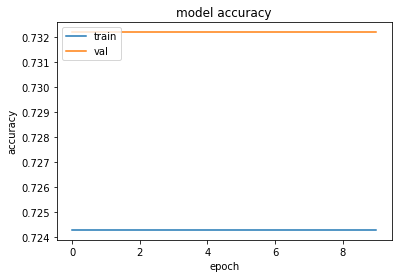

In [82]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [172]:
#fileName_test = input("Enter filename to test: ")

Enter filename to test: 0000f269f.jpg


Enter filename to test: 0000f269f.jpg
ClassId__Defect3 (0.726)
ClassId__Defect1 (0.125)
ClassId__Defect2 (0.0343)


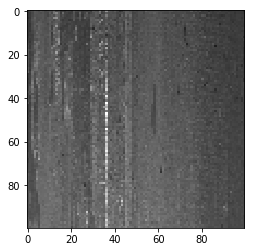

In [83]:
fileName_test = input("Enter filename to test: ")
import os
localFolder_test = '/home/primukh26/testimages/'
localpath_test = localFolder_test + fileName_test
img = image.load_img(localpath_test,target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,100,100,3))
classes = np.array(train_c.columns[-4:])
proba = model.predict(img.reshape(1,100,100,3))
top_3 = -np.argsort(-proba[0])
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [190]:
#print(proba)

[[0.12248371 0.03436248 0.7283325  0.11482131]]


In [191]:
#type(proba)

numpy.ndarray

In [192]:
#top_3 = -np.argsort(-proba[0])

In [206]:
top_3

array([-2,  0, -3, -1])

In [198]:
for i in range(3):
    print(" ({:.3})".format(proba[0][top_3[i]]))

 (0.0344)
 (0.115)
 (0.122)


In [199]:
classes = np.array(train_c.columns[-4:])

In [200]:
classes

array(['ClassId__Defect1', 'ClassId__Defect2', 'ClassId__Defect3',
       'ClassId__Defect4'], dtype=object)

In [201]:
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))

ClassId__Defect2 (0.0344)
ClassId__Defect4 (0.115)
ClassId__Defect1 (0.122)


In [50]:
#Preprocess test data
img = image.load_img('/home/primukh26/testimages/0000f269f.jpg',target_size=(100,100,3))
img = image.img_to_array(img)
img = img/255

Defect 3


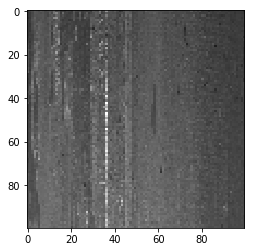

In [91]:
#Predict
classes = np.array(train_clean.columns[1-4:])
proba = model.predict(img.reshape(1,100,100,3))
#top_3 = np.argsort(proba[0])
#for i in range(3):
 #   print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
if proba[0][0] == 1 and proba[0][1] == 0 and proba[0][2] == 0 and proba[0][3] == 0:
    print("Defect 1")
elif proba[0][0] == 0 and proba[0][1] == 1 and proba[0][2] == 0 and proba[0][3] == 0:
    print("Defect 2")
elif proba[0][0] == 0 and proba[0][1] == 0 and proba[0][2] == 1 and proba[0][3] == 0:
    print("Defect 3")
elif proba[0][0] == 0 and proba[0][1] == 0 and proba[0][2] == 0 and proba[0][3] == 1:
    print("Defect 4")
else:
    print("No Defects")
plt.imshow(img)


In [82]:
if proba[0][0] == 1:
    print("Defect 1")
elif proba[0][1] == 1:
    print("Defect 2")
elif proba[0][2] == 1:
    print("Defect 3")
elif proba[0][3] == 1:
    print("Defect 4")

Defect 3


In [83]:
proba[0]

array([0., 0., 1., 0.], dtype=float32)

In [87]:
top_3 = np.argsort(proba[0])

In [86]:
np.argsort(proba[0])

array([0, 1, 3, 2])

In [88]:
for i in range(3):
    top_3[i]